<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/Final_Project_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Questions**

Royal Mail Ship Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City.

"What sorts of people were more likely to survive?” using passenger data (ie  age, gender, cabins, fare, socio-economic class, etc).

The dataset used for this project is from Kaggle.

**Prepare the data analysis**

Loading the package as well as loading the data

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import matplotlib.pyplot as plt#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
import seaborn as sns#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.



In [ ]:
from google.colab import files
uploaded = files.upload()

**Loading the Titanic Dataset from my computer**

I am loading it into a DataFrame with read_csv

In [ ]:
import io
titanic = pd.read_csv(io.BytesIO(uploaded['Titanic.csv']))
# Dataset is now stored in a Pandas Dataframe

print(titanic)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


**Viewing some of the rows in the Titanic Dataset (Data Exploration)**

Format for floating-point values

In [ ]:
pd.set_option('precision',2) 

To save space, I want to view the first five rows with DataFrame methods head

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


To save space, I want to view the last five rows with DataFrame method tail

In [ ]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
print("Titanic: rows:{} cols:{}".format(titanic.shape[0], titanic.shape[1]))

Titanic: rows:891 cols:12


File "titanic" contains the following values, I am exploring the various features or attributes of this file to understand the data:

PassengerID - the index of the passenger (in the dataset);

PClass - the class of the passenger (from 1 to 3);

Name - the name of the passenger;

Sex - the sex of the passenger (female or male);

Age - the age (where available) of the passenger;

SibSp - the number of sibilings / spouses aboard of Titanic;

Parch - the number of parents / children aboard of Titanic;

Ticket - the ticket number;

Fare - the passenger fare (ticket cost);

Cabin - the cabin number;

Embarked - the place of embarcation(It is the act of passengers and crew getting on a ship) of the passenger (C = Cherbourg, Q = Queenstown, S = Southampton).

The titanic data has the target value, Survived.




*Check datatypes of all the columns*

In [ ]:
titanic.dtypes

id            int64
survived      int64
class         int64
name         object
sex          object
age         float64
sibSpo        int64
parChil       int64
ticket       object
fare        float64
cabin        object
embarked     object
deck         object
dtype: object

*know the information of data*

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Customizing the Column Names**

clean up by setting the column names

In [ ]:
titanic.columns=['id','survived','class','name','sex','age','sibSpo','parChil','ticket','fare','cabin','embarked']


In [ ]:
titanic.head()

,id,survived,class,name,sex,age,sibSpo,parChil,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


**Checking if there are missing data, unlabeled data or data that is inconsistently labeled.**

*missing data*

In [ ]:
def missing_data(t_data):
    tot = t_data.isnull().sum().sort_values()
    per = (t_data.isnull().sum()/t_data.isnull().count()*100).sort_values()
    return pd.concat([tot, per], axis=1, keys=['Total', 'Percentage'])
missing_data(titanic)

,Total,Percentage
id,0,0.00
survived,0,0.00
class,0,0.00
name,0,0.00
sex,0,0.00
sibSpo,0,0.00
parChil,0,0.00
ticket,0,0.00
fare,0,0.00
embarked,2,0.22


You can see at first sight that there are missings for embarked,age and cabin. So it is important task to clean up the data in a first step.Perform the data cleansing for the entire data set.

**Data Cleansing**

*age:*I don't want to delete all rows with missing age values, therefore I will replace the missings. As you can see we have a distribution for age and the median should a good choice for substitution. The median of age differs for the passenger classes. Professional advancement usually comes with increasing age *and* experience. Therefore, people with a higher socio-economic status are older on average. If I split up by sex I see that there is still a difference because women are younger in general. In a last step I have checked the number of cases to ensure that there are still enough cases in each category.I use these median values to replace the missings.


*Median for age separated by class*

In [ ]:
titanic.groupby('class')['age'].median()

class
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

*Median for age separated by class and sex*

In [ ]:
titanic.groupby(['class','sex'])['age'].median()

class  sex   
1      female    35.0
       male      40.0
2      female    28.0
       male      30.0
3      female    21.5
       male      25.0
Name: age, dtype: float64

*Number of cases*

In [ ]:
titanic.groupby(['class','sex'])['age'].count()

class  sex   
1      female     85
       male      101
2      female     74
       male       99
3      female    102
       male      253
Name: age, dtype: int64

*Replace the missings values with the medians of each group*-solution

In [ ]:
titanic['age']=titanic.groupby(['class','sex'])['age'].apply(lambda x:x.fillna(x.median()))

*cabin*

In [ ]:
titanic['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
print("In this titanic dataset,There are "+str(titanic['cabin'].isnull().sum())+" cases are missing and "+str(titanic['cabin'].nunique())+" different values.")

In this titanic dataset,There are 687 cases are missing and 147 different values.


From the above cabin analysis, the first class had the cabins on deck A,B or C, a mix of it was on D or E and the third class was mainly on F or G. Identify the deck by the first letter.

*Keep all first letters of cabin in a new variable and use "M" for each missing person*

In [ ]:
titanic['deck']=titanic['cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')
titanic

,id,survived,class,name,sex,age,sibSpo,parChil,ticket,fare,cabin,embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.45,NaN,S,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,C


*graph*

Text(0.5, 0.98, 'Rate of survival according to different cabins')

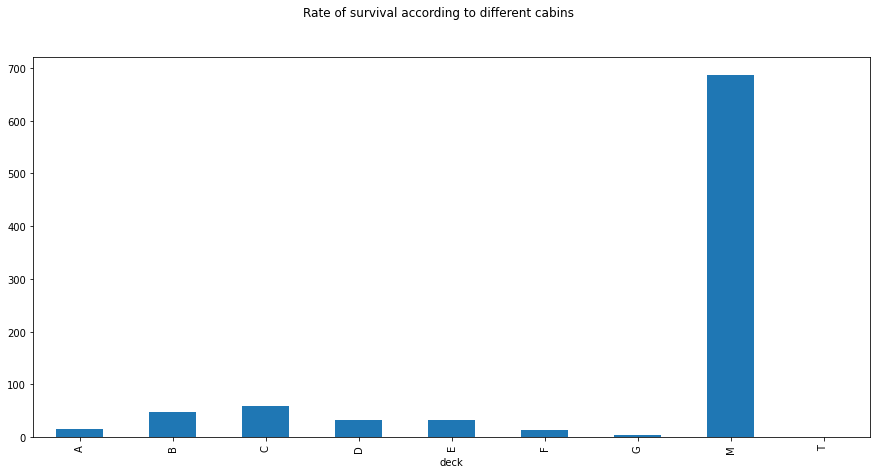

In [ ]:
titanic[['deck','survived']].groupby('deck')['survived'].count().plot(kind='bar',figsize=(15,7))
plt.suptitle('Rate of survival according to different cabins')


*There are significant differences in survival rates because guests on the upper decks were quicker on the lifeboats. *

*I group up some decks.*

In [ ]:

titanic['deck']=titanic['deck'].replace(['A','B','C'],'ABC')
titanic['deck']=titanic['deck'].replace(['D','E'],'DE')
titanic['deck']=titanic['deck'].replace(['F','G'],'FG')
titanic['deck'].value_counts()
titanic['deck'].value_counts().to_frame()


,deck
M,687
ABC,121
DE,65
FG,17
T,1


*Embarked*

In [ ]:
titanic.loc[titanic['embarked'].isnull()]

,id,survived,class,name,sex,age,sibSpo,parChil,ticket,fare,cabin,embarked,deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,ABC
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,ABC


*Check for passengers who were in passenger class -1 , on deck ABC and paid 80 or less for the tickets*

In [ ]:
titanic.loc[(titanic['class']==1) & (titanic['fare'] <= 80) & (titanic['deck']=='ABC')]['embarked'].value_counts()

S    37
C    26
Name: embarked, dtype: int64

There are just two missings for embarked. I can look up similiar cases to replace the missing value, as I already tried for the fare case . It stands to reason that people who paid a similar amount, also had a class 1 ticket and were on the same deck, embarked from the same location.

In [ ]:
titanic.loc[titanic['embarked'].isnull(),'embarked']='S'
titanic

,id,survived,class,name,sex,age,sibSpo,parChil,ticket,fare,cabin,embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,ABC
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,ABC
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.45,NaN,S,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,ABC


*both embarked in Southhampton. *

In [ ]:
def missing_data(t_data):
    tot = t_data.isnull().sum().sort_values()
    per = (t_data.isnull().sum()/t_data.isnull().count()*100).sort_values()
    return pd.concat([tot, per], axis=1, keys=['Total', 'Percentage'])
missing_data(titanic)

,Total,Percentage
id,0,0.0
survived,0,0.0
class,0,0.0
name,0,0.0
sex,0,0.0
age,0,0.0
sibSpo,0,0.0
parChil,0,0.0
ticket,0,0.0
fare,0,0.0



I have not dropped a column yet and try to fill every missing value in our data set. I created a new category for cabin. I used statistical methods for fare and age. Also I found some missing values in column "embarked". 


In [ ]:
#Missing values in the data set
print(titanic.isnull().sum())

id            0
survived      0
class         0
name          0
sex           0
age           0
sibSpo        0
parChil       0
ticket        0
fare          0
cabin       687
embarked      0
deck          0
dtype: int64


**Data Analysis with the Titanic Disaster Dataset**

In [ ]:
titanic.describe()

,id,survived,class,age,sibSpo,parChil,fare
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.11,0.52,0.38,32.20
std,257.35,0.49,0.84,13.30,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,21.50,0.00,0.00,7.91
50%,446.00,0.00,3.00,26.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,36.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


describe on a DataFrame containing both numeric and non-numeric columns, describe calculates these statistics only for the numeric columns—in this case, just the id,survived,class,age,sibPro,parChil,fare columns:

*Note:Before cleansing data:*

Look at the column "age"
Note the discrepancy in the count (714) vs. the dataset’s number of rows (891—the last row’s index was 890 when I called tail). Only 714 (the count above) of the records contained an age value. The rest were missing and marked as NaN, as in row 888. When performing calculations, Pandas ignores missing data (NaN) by default. For the 714 people with valid ages, the average (mean) age was 29.70 years old. The youngest passenger (min) was just over five months old (0.42 * 12 is 5.04), and the oldest (max) was 80. The median age was 28 (indicated by the 50% quartile). The 25% quartile is the median age in the first half of the passengers (sorted by age), and the 75% quartile is the median of the second half of passengers.

In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.I noted standard deviation is 14.53 according to this dataset.

Boxplot is another way to represent the distribution of data. It is a graphical representation of the concentration of the data.

Box plot shows the quartiles of the data. That is, 25th percentile, median (50th percentile), 75th percentile. The range from the 25th percentile to the 75th percentile is called the Inter-Quartile Range (IQR).

The boxplot also shows whiskers. Whiskers are usually 1.5 times the interquartile range. So the top whisker is at 75th percentile + 1.5IQR. The bottom whisker is at 25th percentile - 1.5IQR. Values outside the whiskers are usually considered as outliers.

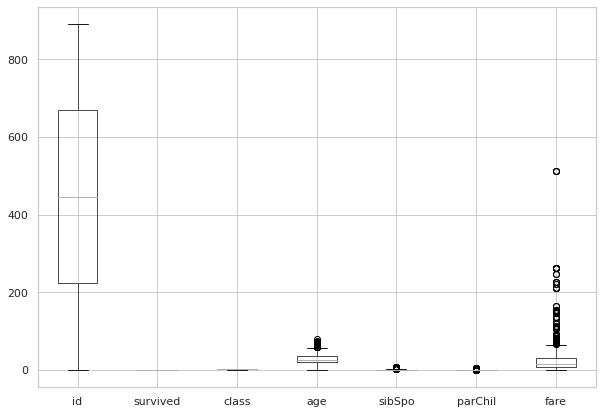

In [ ]:
plt.figure(figsize = (10,7))
titanic.boxplot()

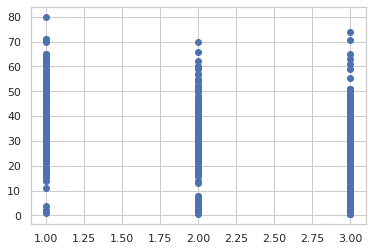

In [ ]:
x=titanic['class']
y=titanic['age']
plt.scatter(x,y)
plt.show()

In [ ]:
(titanic.age).describe()

count    891.00
mean      29.11
std       13.30
min        0.42
25%       21.50
50%       26.00
75%       36.00
max       80.00
Name: age, dtype: float64

*Convert the survived column to a categorical variable*

In [ ]:
#titanic["survived"] = titanic.survived.map({ 0 : "no", 1 : "yes"}).astype("category")

titanic

,id,survived,class,name,sex,age,sibSpo,parChil,ticket,fare,cabin,embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,ABC
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,ABC
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.45,NaN,S,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,ABC


Determine some statistics about people who survived.Compare the survived column to 'yes' to get a new Series containing True/False values, then use describe to summarize the results:

In [ ]:
#(titanic.survived == "yes").describe()

For non-numeric data, describe displays different descriptive statistics: 

count is the total number of items in the result. 

unique is the number of unique values (2) in the result—True (survived) and False (died). 

top is the most frequently occurring value in the result. 

freq is the number of occurrences of the top value.

**Visualization - Titanic dataset **

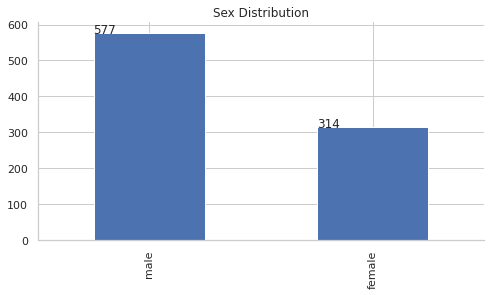

In [ ]:
sex = titanic['sex'].value_counts().plot.bar(title = 'Sex Distribution',figsize = (8,4))
sex

for p in sex.patches:
    
    sex.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
    
sns.despine()#Remove the top and right spines from plot(s).


Text(0.5, 0, 'Age')

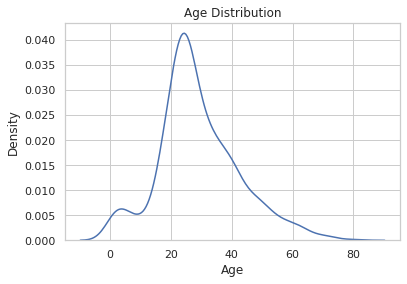

In [ ]:
sns.set(style = 'whitegrid')
# Plotting the KDE Plot
#KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. 
age = sns.kdeplot(titanic['age'])
age.set_title ('Age Distribution')
age.set_xlabel('Age')



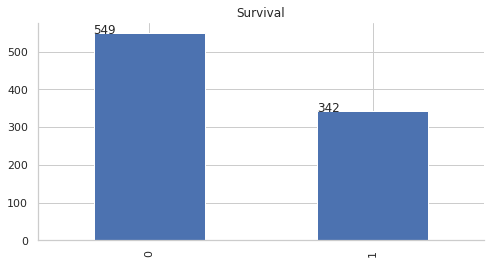

In [ ]:
survived = titanic['survived'].value_counts().plot.bar(title = 'Survival',figsize = (8,4))

for p in survived.patches:
    survived.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
    
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


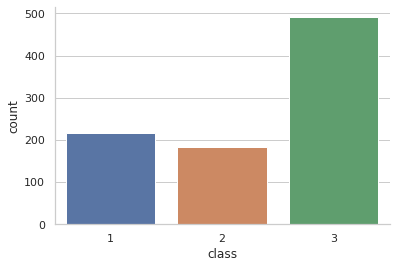

In [ ]:
sns.countplot(titanic['class'])#countplot() method is used to Show the counts of observations in each categorical bin using bars
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


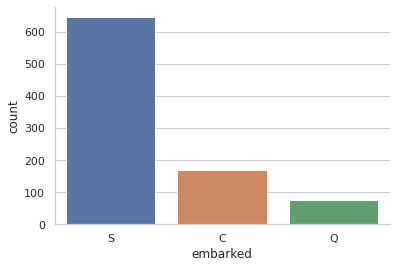

In [ ]:
sns.countplot(titanic['embarked'])
sns.despine()

*Embarked - the place of embarcation(It is the act of passengers and crew getting on a ship) of the passenger (C = Cherbourg, Q = Queenstown, S = Southampton).*

We can summarize the number of survival for each class by using pivot table

In [ ]:
titanic.columns

Index(['id', 'survived', 'class', 'name', 'sex', 'age', 'sibSpo', 'parChil',
       'ticket', 'fare', 'cabin', 'embarked', 'deck'],
      dtype='object')

In [ ]:
titanic.pivot_table(values = "survived", index = 'class', columns = 'fare', aggfunc = 'count')


fare,0.00,4.01,5.00,6.24,6.44,6.45,6.50,6.75,6.86,6.95,6.97,7.05,7.05,7.05,7.12,7.14,7.22,7.23,7.25,7.31,7.50,7.52,7.55,7.63,7.65,7.72,7.73,7.73,7.74,7.74,7.75,7.78,7.79,7.80,7.80,7.83,7.85,7.88,7.88,7.89,...,73.50,75.25,76.29,76.73,77.29,77.96,78.27,78.85,79.20,79.65,80.00,81.86,82.17,83.16,83.47,86.50,89.10,90.00,91.08,93.50,106.42,108.90,110.88,113.28,120.00,133.65,134.50,135.63,146.52,151.55,153.46,164.87,211.34,211.50,221.78,227.53,247.52,262.38,263.00,512.33
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,3.0,2.0,3.0,2.0,2.0,4.0,3.0,2.0,1.0,2.0,3.0,2.0,3.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,3.0,4.0,2.0,2.0,3.0,2.0,4.0,3.0,2.0,3.0,1.0,1.0,4.0,2.0,2.0,4.0,3.0
2,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,NaN,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,7.0,2.0,4.0,1.0,12.0,15.0,13.0,1.0,3.0,1.0,4.0,1.0,4.0,1.0,1.0,4.0,2.0,1.0,34.0,16.0,1.0,6.0,1.0,2.0,13.0,1.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
titanic_survival_table = titanic.pivot_table(values = "survived",
                                 columns = 'class',
                                 index = 'fare',
                                 aggfunc = 'count',
                                 margins = True)
titanic_survival_table

class,1,2,3,All
fare,,,,
0.0,5.0,6.0,4.0,15
4.0125,NaN,NaN,1.0,1
5.0,1.0,NaN,NaN,1
6.2375,NaN,NaN,1.0,1
6.4375,NaN,NaN,1.0,1
...,...,...,...,...
247.5208,2.0,NaN,NaN,2
262.375,2.0,NaN,NaN,2
263.0,4.0,NaN,NaN,4


I can now sort by the rows that have the highest values.

In [ ]:
titanic_survival_table.sort_values(by="All", ascending=False)

class,1,2,3,All
fare,,,,
All,216.0,184.0,491.0,891
8.05,NaN,NaN,43.0,43
13.0,NaN,42.0,NaN,42
7.8958,NaN,NaN,38.0,38
7.75,NaN,NaN,34.0,34
...,...,...,...,...
47.1,1.0,NaN,NaN,1
8.4042,NaN,NaN,1.0,1
42.4,1.0,NaN,NaN,1


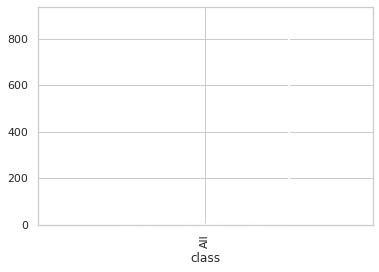

In [ ]:


titanic_survival_table.pivot_table("All",columns = "fare").plot(kind="bar", legend=None)


I want to see the outliers of fare

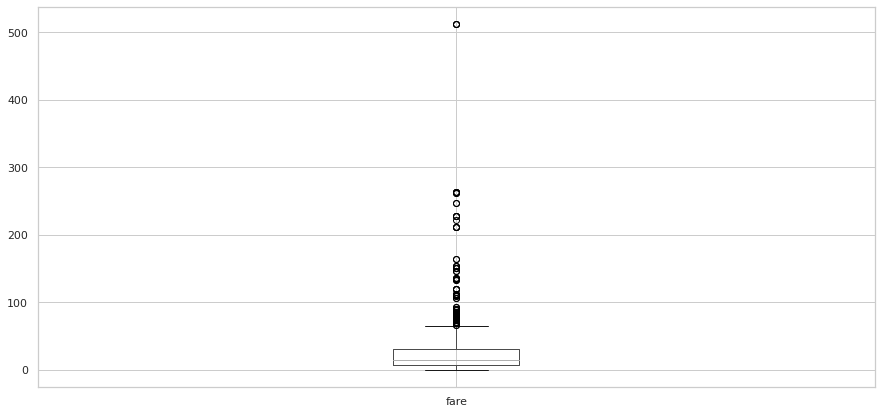

In [ ]:
titanic.boxplot(column=['fare'],figsize=(15,7))

I want to see the outliers of age

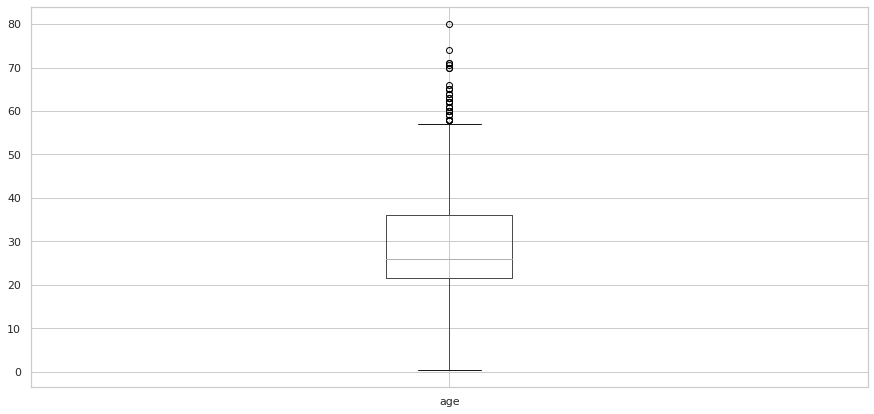

In [ ]:
titanic.boxplot(column=['age'],figsize=(15,7))

*There are outliers for both age and fare. The range of values is much higher for fare compared to age.*

In [ ]:
titanic[['age','survived']].groupby('age')['survived'].mean()

age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: survived, Length: 89, dtype: float64

Text(0.5, 0.98, 'Survival Rate according to age ')

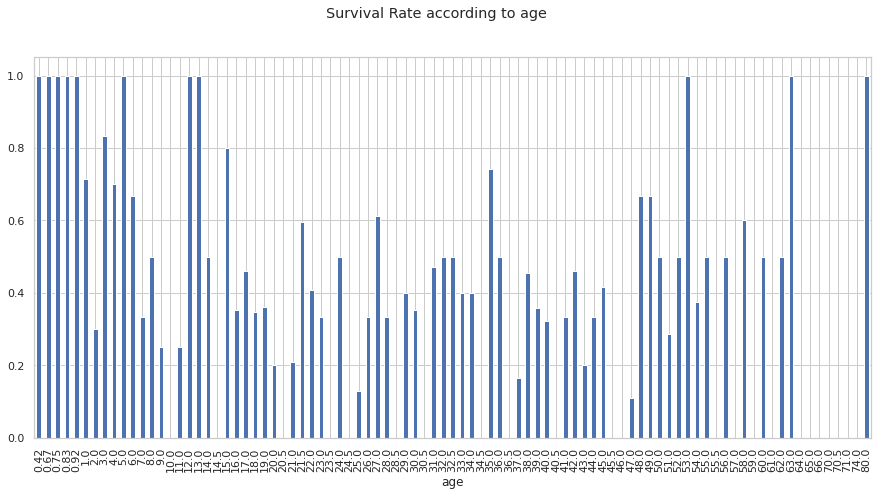

In [ ]:
titanic[['age','survived']].groupby('age')['survived'].mean().plot(kind="bar",figsize=(15,7))
plt.suptitle("Survival Rate according to age ")

In [ ]:
titanic[['fare','survived']].groupby('fare')['survived'].mean()

fare
0.00      0.07
4.01      0.00
5.00      0.00
6.24      0.00
6.44      0.00
          ... 
227.53    0.75
247.52    0.50
262.38    1.00
263.00    0.50
512.33    1.00
Name: survived, Length: 248, dtype: float64

Text(0.5, 0.98, 'Survival Rate according to fare ')

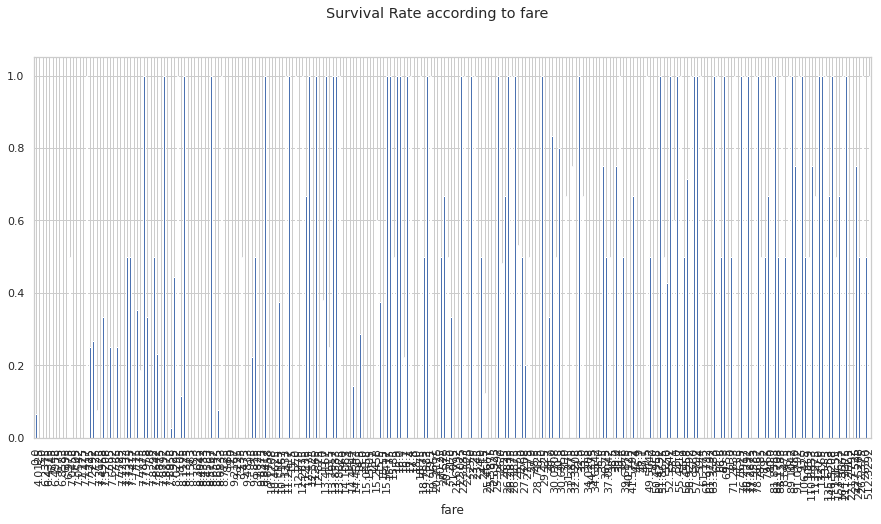

In [ ]:
titanic[['fare','survived']].groupby('fare')['survived'].mean().plot(kind="bar",figsize=(15,7))
plt.suptitle("Survival Rate according to fare ")

I cut the distribution into pieces so that the outliers do not irritate. For fare I assign the same number of cases to each category and for Age I build the categories based on the values of the variable. 

This is also the difference between cut and qcut. With cut, the bins are formed based on the values of the variable, regardless of how many cases fall into a category. With qcut I decompose a distribution so that there are the same number of cases in each category.

In [ ]:
titanic['fare']=pd.qcut(titanic['fare'],5)


pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')

Quantile-based discretization function.

Discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data point.

In [ ]:
titanic['age']=pd.cut(titanic['age'].astype(int),5)

pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

For fare,each category has nearly a same number of cases

In [ ]:
titanic['fare'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: fare, dtype: int64

For age,each category has a different number of cases


In [ ]:
titanic['age'].value_counts()

(16.0, 32.0]     495
(32.0, 48.0]     216
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: age, dtype: int64

I rewrite the same code

In [ ]:
titanic[['age','survived']].groupby('age')['survived'].mean()

age
(-0.08, 16.0]    0.55
(16.0, 32.0]     0.34
(32.0, 48.0]     0.41
(48.0, 64.0]     0.43
(64.0, 80.0]     0.09
Name: survived, dtype: float64

Text(0.5, 0.98, 'Survival Rate according to age ')

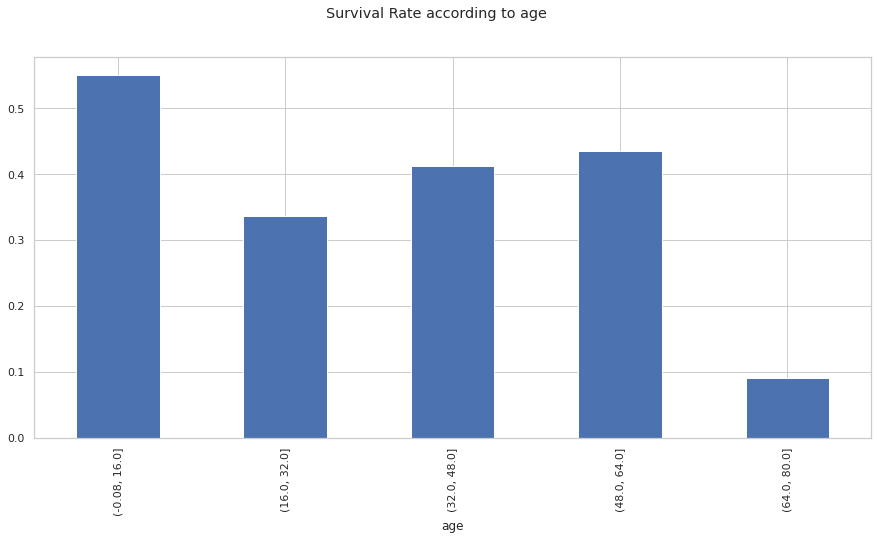

In [ ]:
titanic[['age','survived']].groupby('age')['survived'].mean().plot(kind="bar",figsize=(15,7))
plt.suptitle("Survival Rate according to age ")

In [ ]:
titanic[['fare','survived']].groupby('fare')['survived'].mean()

fare
(-0.001, 7.854]      0.22
(7.854, 10.5]        0.20
(10.5, 21.679]       0.42
(21.679, 39.688]     0.44
(39.688, 512.329]    0.64
Name: survived, dtype: float64

Text(0.5, 0.98, 'Survival Rate according to fare ')

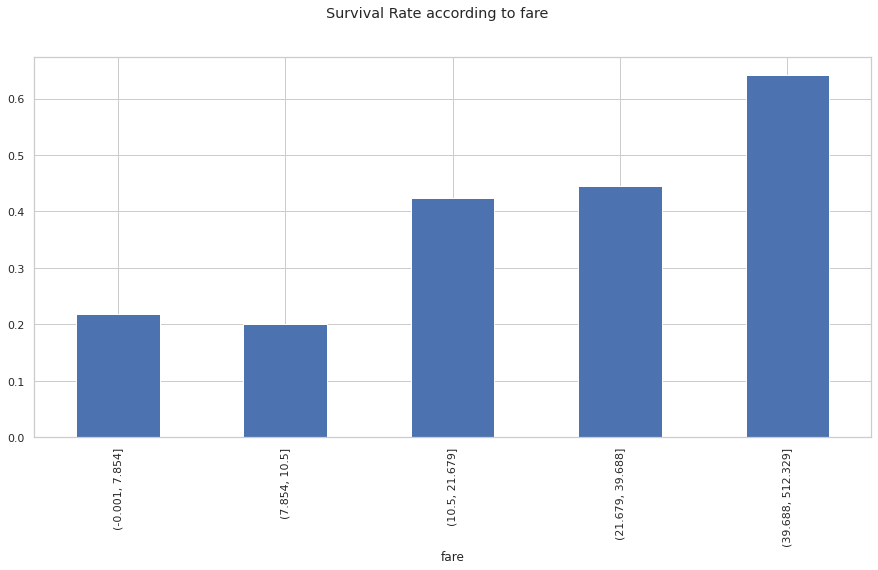

In [ ]:
titanic[['fare','survived']].groupby('fare')['survived'].mean().plot(kind="bar",figsize=(15,7))
plt.suptitle("Survival Rate according to fare ")

Conclusions:-

Young people were probably rescued first,on average younger passengers have a higher chance of survival and so do people with higher ticket prices because the people with higher ticket prices had access to the lifeboats first.

But there is still a lot to do????????????????????????

Finally,

I Learn Data Science Life Cycle

1. Framing the problem 
2. Collecting data
3. Processing the data
4. Exploring the data
5. Analyzing the data
6. Consolidating results

Thank you!!